In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data
file_path = '/content/marketing_analysis.xlsx'  # Adjust with actual path
data = pd.ExcelFile(file_path)
df = pd.read_excel(data, sheet_name='Campaign_Data')  # Replace 'Sheet1' with the actual sheet name if needed

# **Data Handling:**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Campaign_ID        2000 non-null   object        
 1   Campaign_Name      2000 non-null   object        
 2   Marketing_Channel  2000 non-null   object        
 3   Start_Date         2000 non-null   datetime64[ns]
 4   End_Date           2000 non-null   datetime64[ns]
 5   Impressions        2000 non-null   float64       
 6   Clicks             2000 non-null   float64       
 7   Conversions        2000 non-null   float64       
 8   Total_Spend        2000 non-null   float64       
 9   Revenue_Generated  2000 non-null   float64       
 10  Location           2000 non-null   object        
 11  Age_Group          2000 non-null   object        
 12  Gender             2000 non-null   object        
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 203.2

In [86]:
print(df.shape)
df.head()

(2000, 13)


,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender
0,CMP1,Seasonal Steals,Influencer Marketing,2022-08-01,2024-04-26,22068.8,3283.2,2155.2,2316.656,8879.568,Baia Mare,25-34,Male
1,CMP2,Cart to Couch,Influencer Marketing,2022-09-18,2024-05-12,32849.6,3307.2,3164.8,7114.128,17302.032,Baia Mare,25-34,Male
2,CMP3,Deal of the Day,Paid Ads,2022-07-26,2024-04-07,12748.8,7494.4,7334.4,3358.448,4892.416,Galați,45-54,Female
3,CMP4,Shop & Share,Paid Ads,2022-08-21,2024-04-26,40196.8,21150.4,3032.0,4426.976,16548.544,Galați,18-24,Male
4,CMP5,Seasonal Steals,Paid Ads,2023-03-04,2024-11-04,4030.4,2806.4,2556.8,2331.776,3538.224,Galați,45-54,Male


In [87]:
df.describe()


,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2022-10-06 18:20:09.600000,2024-06-13 12:41:02.400000,40096.067200,20140.668800,10127.826400,4078.599128,10610.869520
min,2022-05-11 00:00:00,2024-01-06 00:00:00,1619.200000,169.600000,3.200000,161.040000,237.728000
25%,2022-07-23 00:00:00,2024-03-30 00:00:00,20174.400000,5545.600000,1577.200000,2112.652000,4890.244000
50%,2022-10-08 00:00:00,2024-06-14 00:00:00,40112.000000,15368.800000,5419.200000,4100.016000,9615.032000
75%,2022-12-22 00:00:00,2024-08-28 00:00:00,59463.200000,30935.200000,14076.400000,6016.000000,15062.004000
max,2023-03-05 00:00:00,2024-11-23 00:00:00,79894.400000,77414.400000,70790.400000,7999.664000,31791.344000
std,NaN,NaN,22628.777225,17314.424266,12024.111326,2245.111135,6922.119093


In [88]:
df.isnull().sum().sort_values(ascending=False).head() #no nan values


,0
Campaign_ID,0
Campaign_Name,0
Marketing_Channel,0
Start_Date,0
End_Date,0


In [89]:
df.duplicated().sum() #no duplicated values


0

# **Calculate Metrics**

In [90]:
# According to the Excel file columns: 'Clicks', 'Conversions', 'Total_Spend', 'Revenue_Generated', and 'Impressions'
df['CVR'] = (df['Conversions'] / df['Clicks']) * 100  # Conversion Rate in percentage

df['CPC'] = df['Total_Spend'] / df['Clicks']  # Cost per Click

df['CPA'] = df['Total_Spend'] / df['Conversions']  # Cost per Conversion

df['ROAS'] = df['Revenue_Generated'] / df['Total_Spend']  # Return on Ad Spend

In [91]:
df.head(2)

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,CVR,CPC,CPA,ROAS
0,CMP1,Seasonal Steals,Influencer Marketing,2022-08-01,2024-04-26,22068.8,3283.2,2155.2,2316.656,8879.568,Baia Mare,25-34,Male,65.643275,0.705609,1.074915,3.832925
1,CMP2,Cart to Couch,Influencer Marketing,2022-09-18,2024-05-12,32849.6,3307.2,3164.8,7114.128,17302.032,Baia Mare,25-34,Male,95.694243,2.151103,2.247892,2.432066


# **Visualize Campaign Performance**

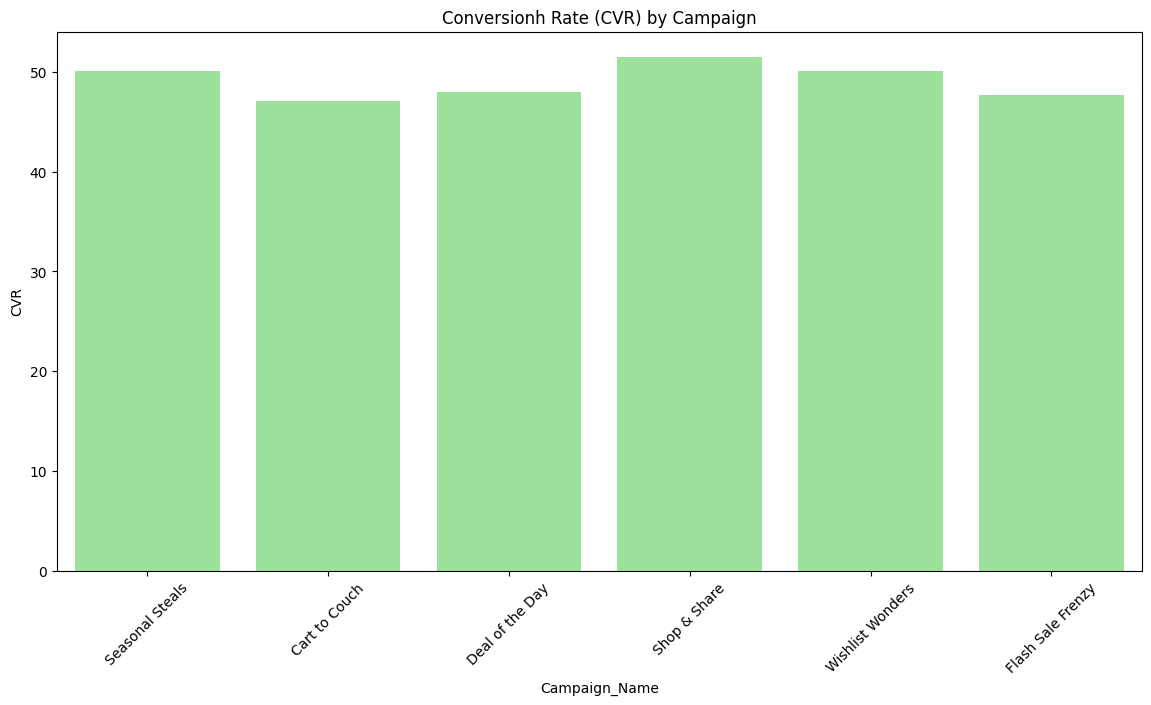

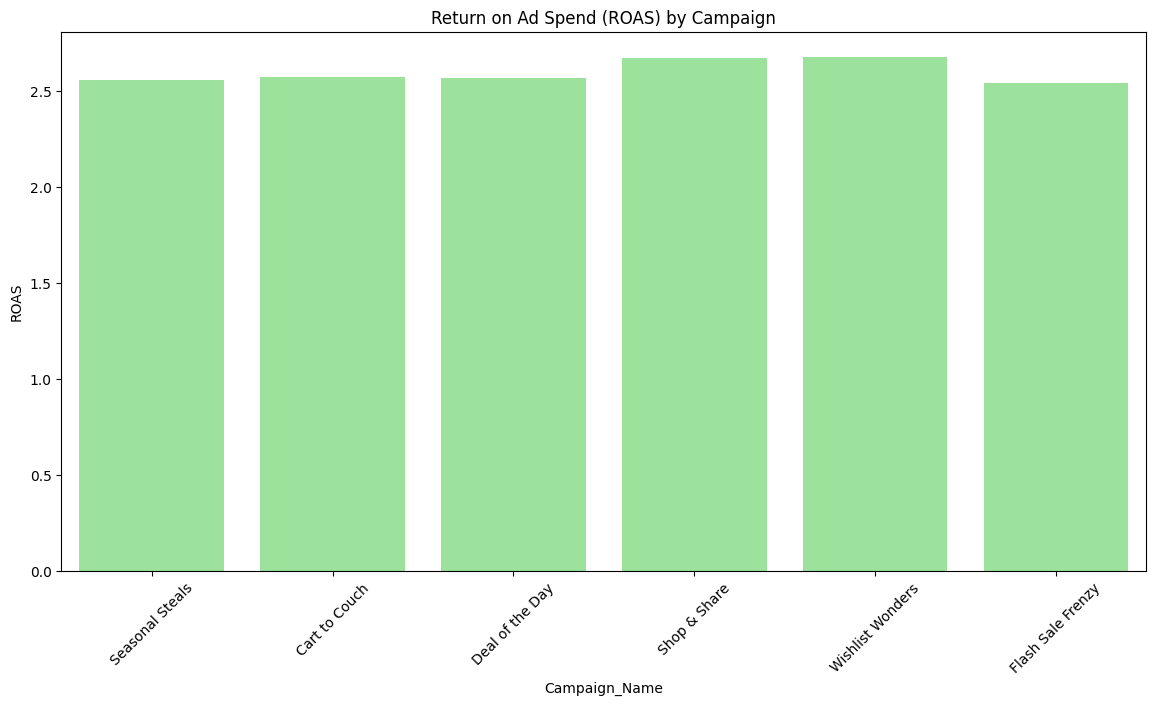

In [92]:
# Bar chart for CVR and ROAS across campaigns
plt.figure(figsize=(14, 7))
sns.barplot(x='Campaign_Name', y='CVR', data=df, color='lightgreen',errorbar=None)
plt.title('Conversionh Rate (CVR) by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Campaign_Name', y='ROAS', data=df, color='lightgreen',errorbar=None)
plt.title('Return on Ad Spend (ROAS) by Campaign')
plt.xticks(rotation=45)
plt.show()

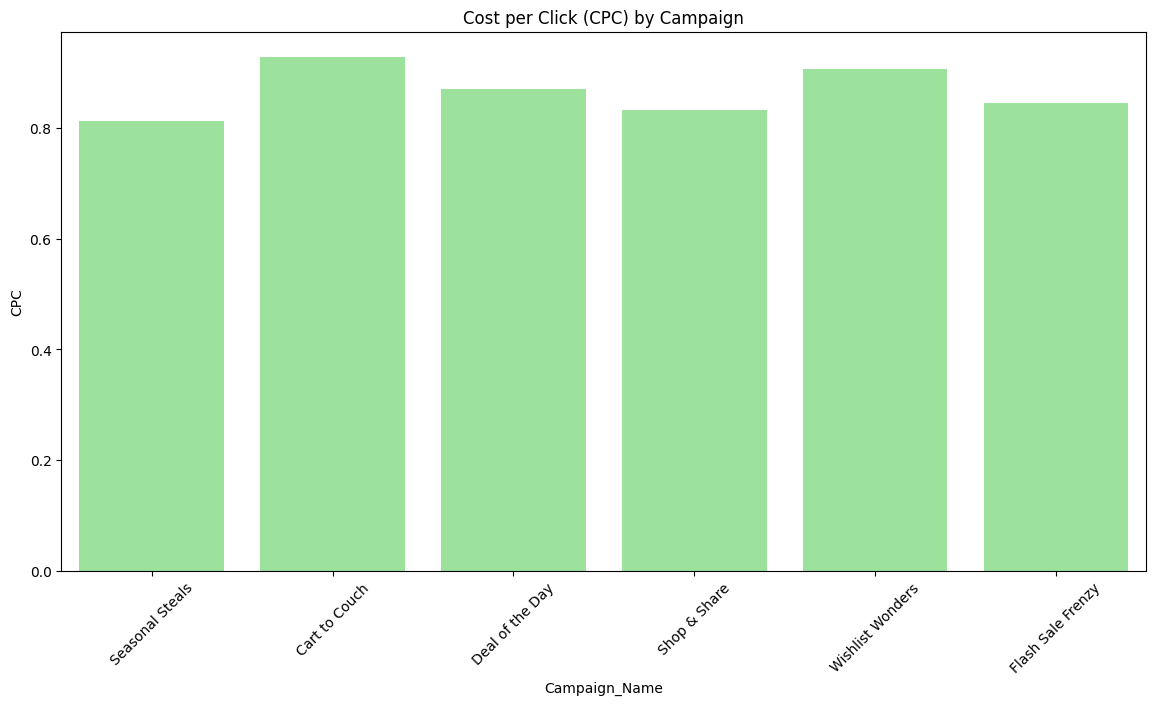

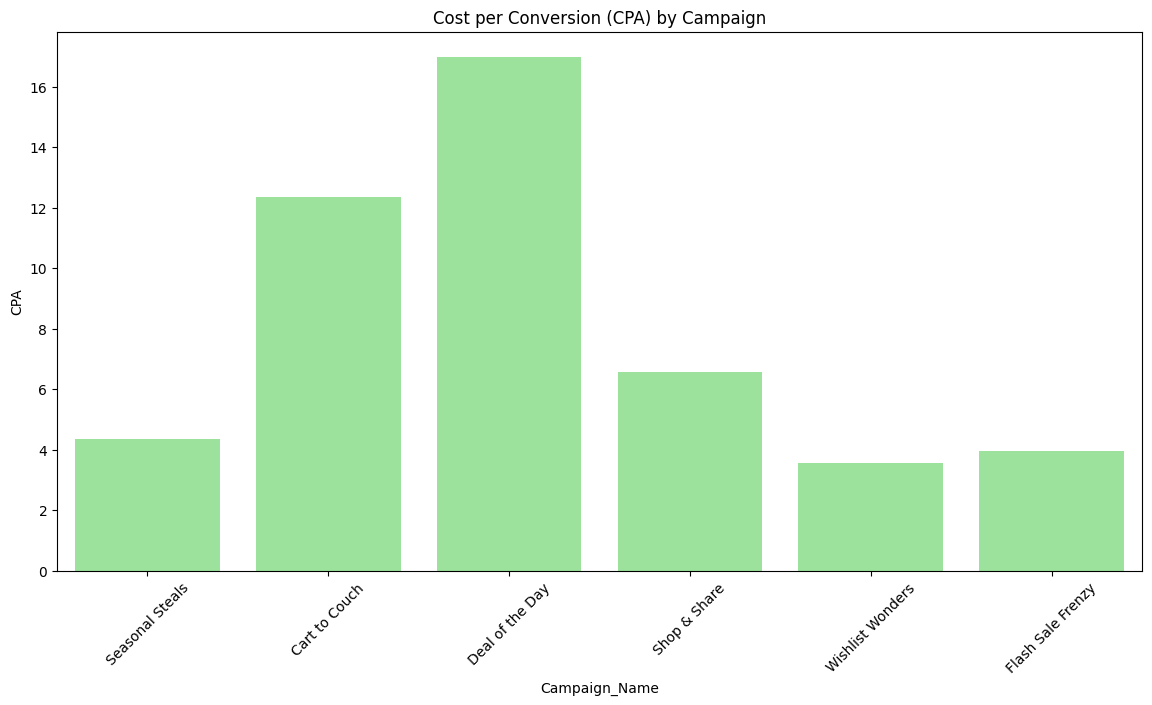

In [93]:
# Bar chart for CPC and CPA across campaigns
plt.figure(figsize=(14, 7))
sns.barplot(x='Campaign_Name', y='CPC', data=df, color='lightgreen',errorbar=None)
plt.title('Cost per Click (CPC) by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Campaign_Name', y='CPA', data=df, color='lightgreen',errorbar=None)
plt.title('Cost per Conversion (CPA) by Campaign')
plt.xticks(rotation=45)
plt.show()

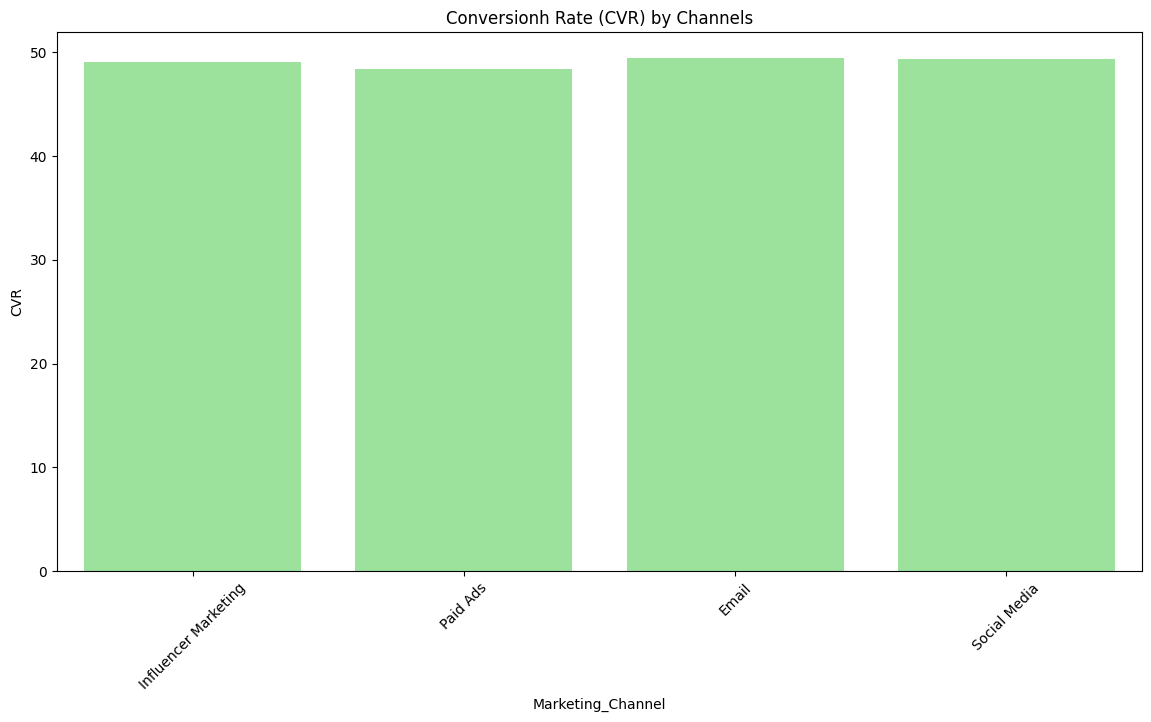

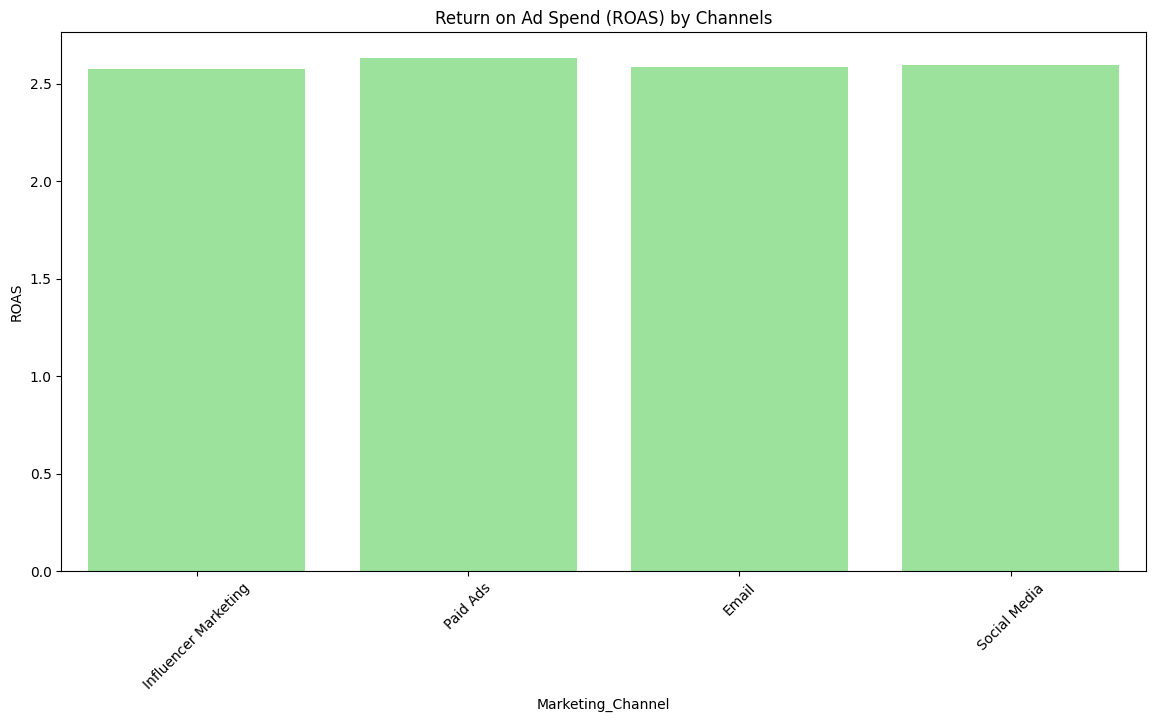

In [94]:
# Bar chart for CVR and ROAS across Channels
plt.figure(figsize=(14, 7))
sns.barplot(x='Marketing_Channel', y='CVR', data=df, color='lightgreen',errorbar=None)
plt.title('Conversionh Rate (CVR) by Channels')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Marketing_Channel', y='ROAS', data=df, color='lightgreen',errorbar=None)
plt.title('Return on Ad Spend (ROAS) by Channels')
plt.xticks(rotation=45)
plt.show()

In [95]:
# Define thresholds for high cost and low ROAS
high_cost_threshold = df['Total_Spend'].mean()  # average spend
low_roas_threshold = df['ROAS'].mean()/2  # ROAS below this threshold is unprofitable
print(low_roas_threshold)
# Filter campaigns with high costs and low ROAS
high_cost_low_roas = df[(df['Total_Spend'] > high_cost_threshold) & (df['ROAS'] < low_roas_threshold)]


1.2982090836921296


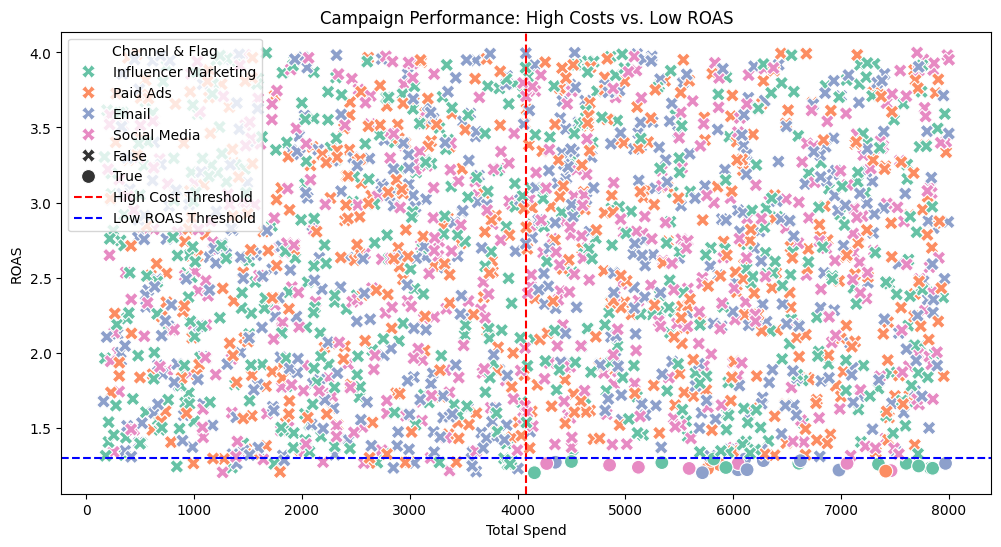

In [96]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,x='Total_Spend', y='ROAS',hue='Marketing_Channel',
    style=df.index.isin(high_cost_low_roas.index),
    markers={True: 'o', False: 'X'},palette='Set2',s=100)
# Highlight campaigns with high costs and low ROAS
plt.axvline(high_cost_threshold, color='red', linestyle='--', label='High Cost Threshold')
plt.axhline(low_roas_threshold, color='blue', linestyle='--', label='Low ROAS Threshold')
# Add labels and title
plt.title('Campaign Performance: High Costs vs. Low ROAS')
plt.xlabel('Total Spend')
plt.ylabel('ROAS')
plt.legend(title='Channel & Flag')
plt.show()

# Demographic Segmentation

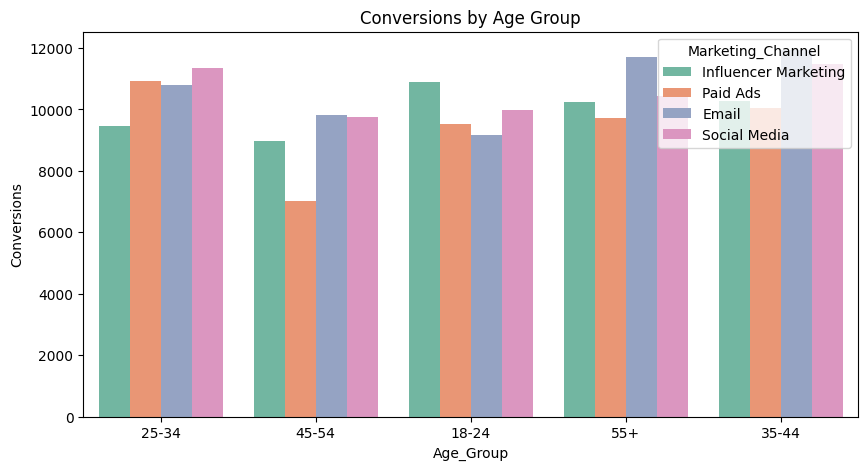

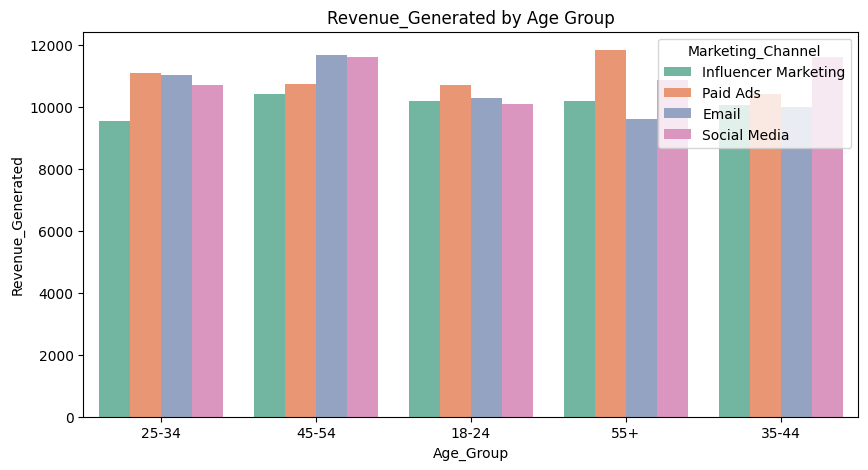

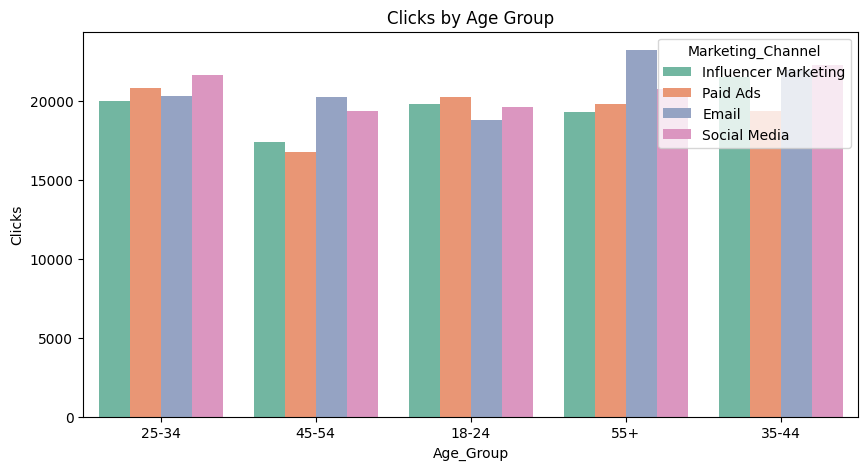

In [97]:
# Group by demographics and analyze performance
# 1- Age:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Conversions', data=df,palette='Set2',hue='Marketing_Channel',errorbar=None)
plt.title('Conversions by Age Group')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Revenue_Generated', data=df,palette='Set2', hue='Marketing_Channel',errorbar=None)
plt.title('Revenue_Generated by Age Group')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Clicks', data=df,palette='Set2',hue='Marketing_Channel',errorbar=None)
plt.title('Clicks by Age Group')
plt.show()

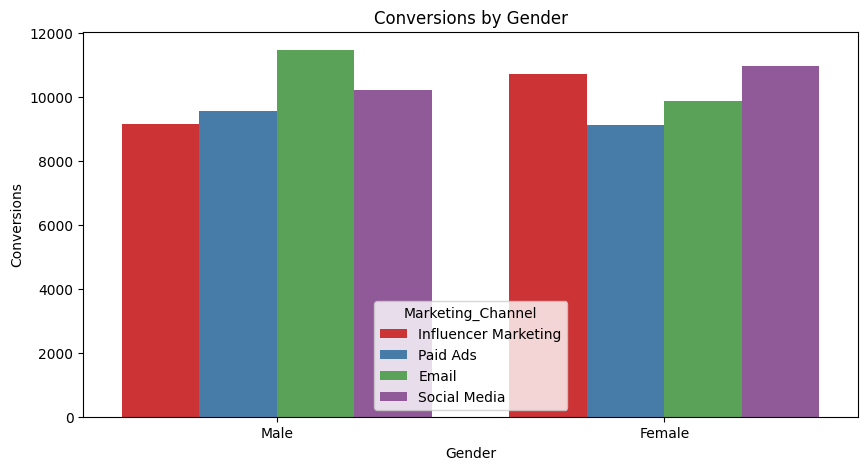

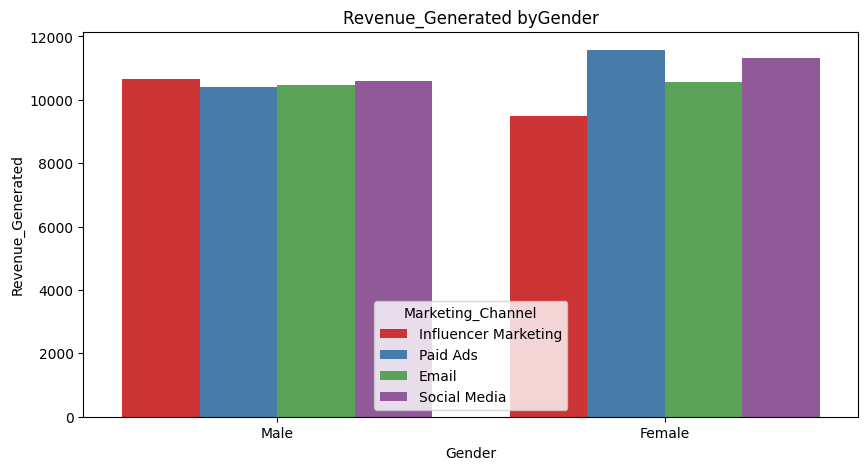

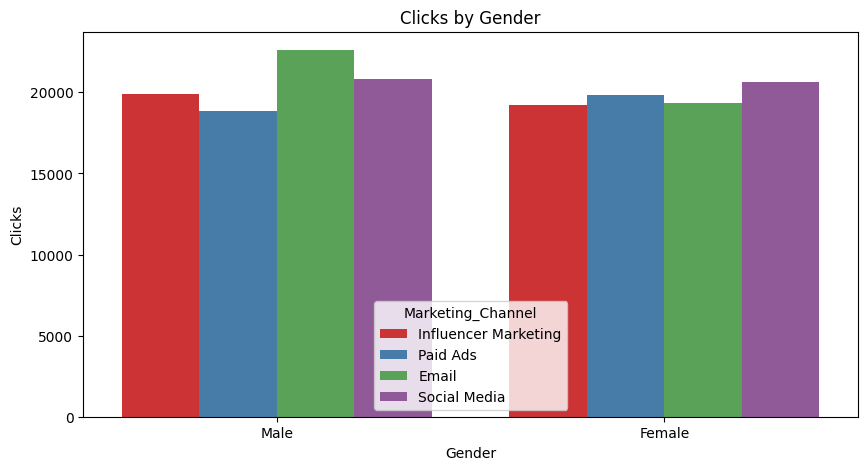

In [98]:
# Group by demographics and analyze performance
# 2- Gender:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Conversions', data=df,palette='Set1',hue='Marketing_Channel',errorbar=None)
plt.title('Conversions by Gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Revenue_Generated', data=df,palette='Set1', hue='Marketing_Channel',errorbar=None)
plt.title('Revenue_Generated byGender')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Clicks', data=df,palette='Set1',hue='Marketing_Channel',errorbar=None)
plt.title('Clicks by Gender')
plt.show()

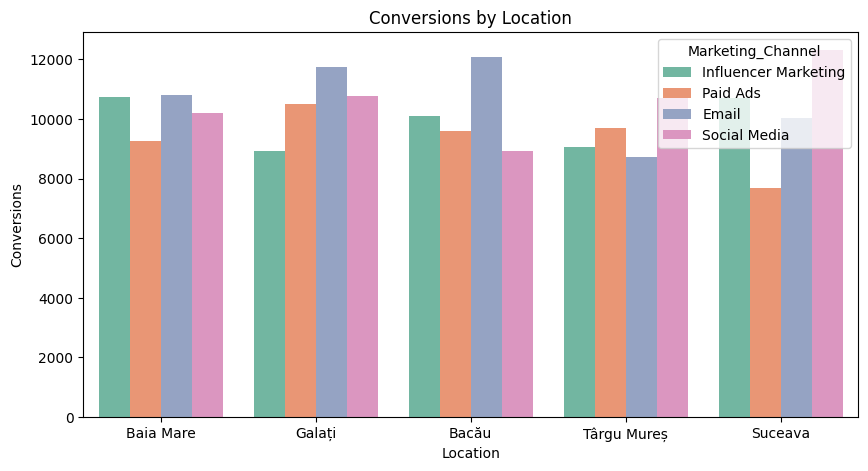

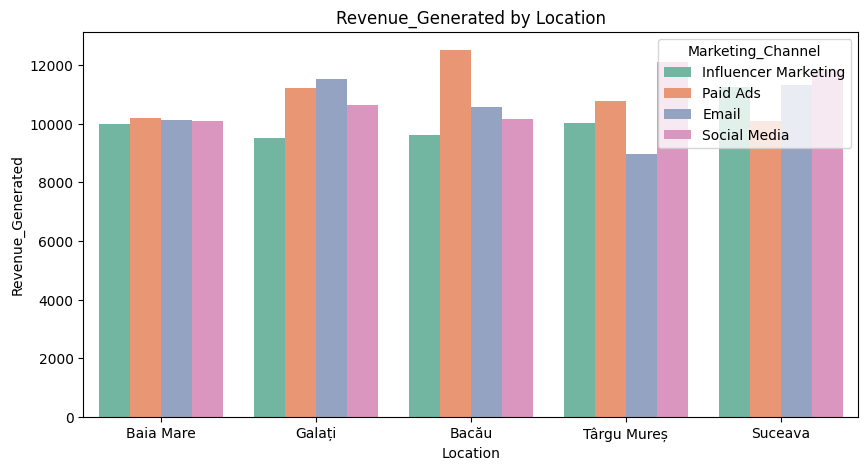

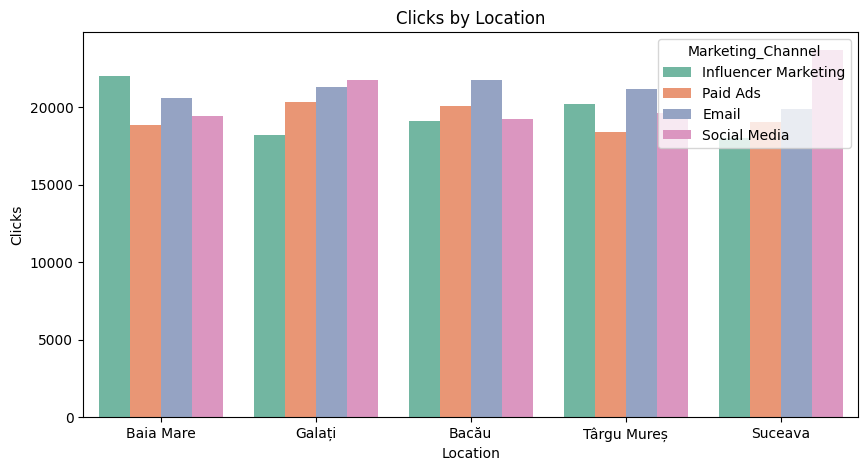

In [99]:
# Group by demographics and analyze performance
# 3- Location:
plt.figure(figsize=(10, 5))
sns.barplot(x='Location', y='Conversions', data=df,palette='Set2',hue='Marketing_Channel',errorbar=None)
plt.title('Conversions by Location')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Location', y='Revenue_Generated', data=df,palette='Set2', hue='Marketing_Channel',errorbar=None)
plt.title('Revenue_Generated by Location')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Location', y='Clicks', data=df,palette='Set2',hue='Marketing_Channel',errorbar=None)
plt.title('Clicks by Location')
plt.show()

# **4.	Time-Based Analysis**

In [106]:
# Sample data
campaign_data = pd.DataFrame({
    'Campaign_ID': df['Campaign_ID'],
    'Start_Date': df['Start_Date'],
    'End_Date': df['End_Date'],
    'Total_Spend': df['Total_Spend'],
    'Revenue_Generated': df['Revenue_Generated'],
    'ROAS': df['ROAS']
})

# Convert start and end dates to datetime
campaign_data['Start_Date'] = pd.to_datetime(df['Start_Date'])
campaign_data['End_Date'] = pd.to_datetime(df['End_Date'])

# Expand the data to include all days within the campaign period
expanded_data = []
for index, row in campaign_data.iterrows():
    date_range = pd.date_range(row['Start_Date'], row['End_Date'], freq='D')
    for date in date_range:
        expanded_data.append({
            'Campaign_ID': row['Campaign_ID'],
            'Date': date,
            'Total_Spend': row['Total_Spend'],
            'Revenue_Generated': row['Revenue_Generated'],
            'ROAS': row['ROAS']
        })

# Convert the list of dicts to a DataFrame
expanded_campaign_data = pd.DataFrame(expanded_data)

# Display the expanded data
print(expanded_campaign_data.head())


  Campaign_ID       Date  Total_Spend  Revenue_Generated      ROAS
0        CMP1 2022-08-01     2316.656           8879.568  3.832925
1        CMP1 2022-08-02     2316.656           8879.568  3.832925
2        CMP1 2022-08-03     2316.656           8879.568  3.832925
3        CMP1 2022-08-04     2316.656           8879.568  3.832925
4        CMP1 2022-08-05     2316.656           8879.568  3.832925


In [108]:
expanded_campaign_data.shape

(1233529, 5)

In [109]:
expanded_campaign_data['Month'] = expanded_campaign_data['Date'].dt.to_period('M')

# Aggregate by month
monthly_performance = expanded_campaign_data.groupby('Month').agg(
    total_spend=('Total_Spend', 'sum'),
    total_revenue=('Revenue_Generated', 'sum'),
    average_roas=('ROAS', 'mean')
).reset_index()

# Display monthly performance
print(monthly_performance)


      Month   total_spend  total_revenue  average_roas
0   2022-05  7.712339e+06   1.893981e+07      2.533406
1   2022-06  3.193872e+07   8.128609e+07      2.584662
2   2022-07  5.818045e+07   1.487166e+08      2.571333
3   2022-08  8.348672e+07   2.148975e+08      2.577832
4   2022-09  1.050509e+08   2.728940e+08      2.597805
5   2022-10  1.348181e+08   3.514376e+08      2.602499
6   2022-11  1.543156e+08   4.014395e+08      2.597671
7   2022-12  1.860768e+08   4.820888e+08      2.589033
8   2023-01  2.117642e+08   5.502171e+08      2.594114
9   2023-02  2.135906e+08   5.566541e+08      2.599423
10  2023-03  2.526142e+08   6.572150e+08      2.596456
11  2023-04  2.447159e+08   6.366522e+08      2.596418
12  2023-05  2.528731e+08   6.578739e+08      2.596418
13  2023-06  2.447159e+08   6.366522e+08      2.596418
14  2023-07  2.528731e+08   6.578739e+08      2.596418
15  2023-08  2.528731e+08   6.578739e+08      2.596418
16  2023-09  2.447159e+08   6.366522e+08      2.596418
17  2023-1

In [110]:
expanded_campaign_data['Week'] = expanded_campaign_data['Date'].dt.to_period('W')

# Aggregate by week
weekly_performance = expanded_campaign_data.groupby('Week').agg(
    total_spend=('Total_Spend', 'sum'),
    total_revenue=('Revenue_Generated', 'sum'),
    average_roas=('ROAS', 'mean')
).reset_index()

# Display weekly performance
print(weekly_performance)


                      Week  total_spend  total_revenue  average_roas
0    2022-05-09/2022-05-15   509877.904   1.149440e+06      2.344461
1    2022-05-16/2022-05-22  2066453.136   5.110970e+06      2.539954
2    2022-05-23/2022-05-29  3797949.760   9.320064e+06      2.534341
3    2022-05-30/2022-06-05  5112127.872   1.296184e+07      2.606186
4    2022-06-06/2022-06-12  6352492.880   1.629576e+07      2.610781
..                     ...          ...            ...           ...
128  2024-10-21/2024-10-27  3621914.624   9.350427e+06      2.583368
129  2024-10-28/2024-11-03  2028459.904   5.164541e+06      2.550211
130  2024-11-04/2024-11-10  1297697.024   3.219462e+06      2.505174
131  2024-11-11/2024-11-17   553090.064   1.285523e+06      2.375944
132  2024-11-18/2024-11-24    78806.160   1.949870e+05      2.475624

[133 rows x 4 columns]


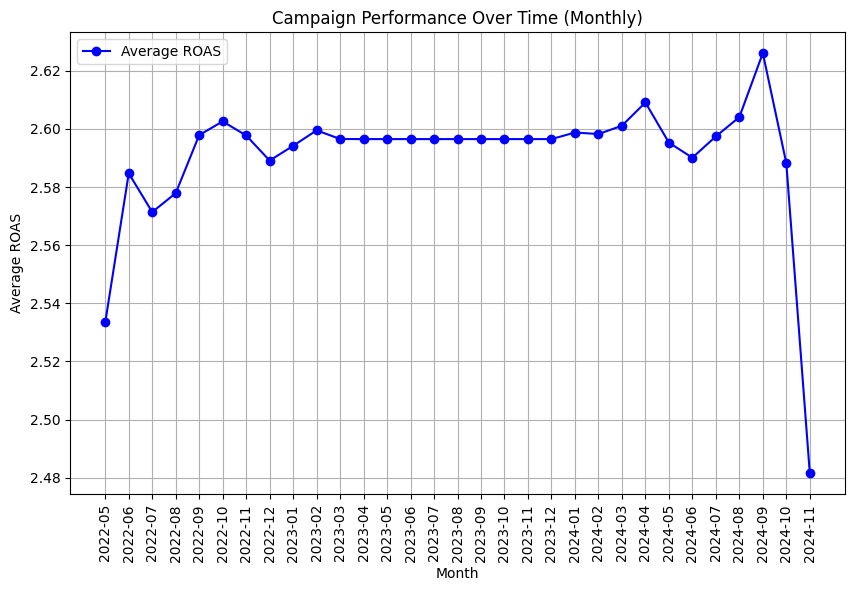

In [113]:
#Plotting monthly performance
plt.figure(figsize=(10, 6))
plt.plot(monthly_performance['Month'].astype(str), monthly_performance['average_roas'], marker='o', color='b', label='Average ROAS')

plt.title('Campaign Performance Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average ROAS')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

plt.show()
